In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 加载数据集
data = pd.read_csv('S-12.csv')
data = data.dropna()
# 划分训练集和测试集
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X

FileNotFoundError: [Errno 2] No such file or directory: 'S-12.csv'

In [30]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
417    6.0
418    6.0
419    6.0
420    6.0
421    6.0
Name: SZ, Length: 422, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('SZ', axis=1), data['SZ'], test_size=0.25, random_state=50)
# 初始化随机森林分类器
rf = RandomForestClassifier(n_estimators=500,max_depth=5,random_state=50)
# 训练随机森林模型
rf.fit(X, y)
# rf.fit(X_train, y_train)
# 获取特征重要性排序
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# 获取特征名字列表
feature_names = list(data.columns[:-1])
# 将特征重要性和名称打包为元组列表
features = list(zip(feature_names, importances))
# 按特征重要性得分排序
sorted_features = sorted(features, key=lambda x: x[1], reverse=True)
# 打印特征重要性得分列表
for feature in sorted_features:
    print(feature[0], feature[1])

CIgreen 0.03955202700457105
Mean_Layer 0.03941482548367812
EVI 0.03512855414006217
RVI 0.035101128732428016
NDVI 0.03428054819918279
DVI 0.027815698885480782
Mean_Lay_3 0.025775425931239188
Mean_Lay_1 0.024608714866308425
Mean_Lay_8 0.023989640702635966
Mean_Lay_9 0.02390960538753038
Mean_Lay_4 0.02261507804388748
Mean_Lay_2 0.02120578376971132
780NDVI 0.02057954526057131
740NDVI 0.017575962260608147
Mean_Lay_7 0.016415789451119246
s2rep 0.01624518864911958
reCI 0.01566961184755952
re1NDVI 0.014910672039334685
VVGLCM_AnB2G_2 0.013146979748984476
re2NDVI 0.012865354144232632
re3NDVI 0.012836560036768656
Mean_Lay_6 0.012678024983100793
reRVI 0.01248817064208154
VVGLCM_Mean_ 0.012077832600430884
Mean_Lay_5 0.012047578794925205
VVGLCM_Entro 0.012035961528721878
VHGLCM_Mean_ 0.011262254651891694
VHGLCM_StdDe 0.010198372037034229
VVGLCM_Dissi 0.010182862217451003
VVGLCM_HomoB2G 0.010113158384882867
VHGLCM_Contr 0.009014220046690821
VVGLCM_Contr 0.008229289616042825
VVGLCM_StdDe 0.00797850978

In [ ]:
#####################################将前X个特征保存至新csv
# feature_names = [f[0] for f in sorted_features[:61]]
# data_new = data[feature_names + ['varieties']]
# data_new.to_csv('before_60feature.csv', index=False)

C:\Users\R6meg\AppData\Local\Temp\ipykernel_3880\2032465482.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bar_colors = plt.cm.get_cmap('Set2', 7)


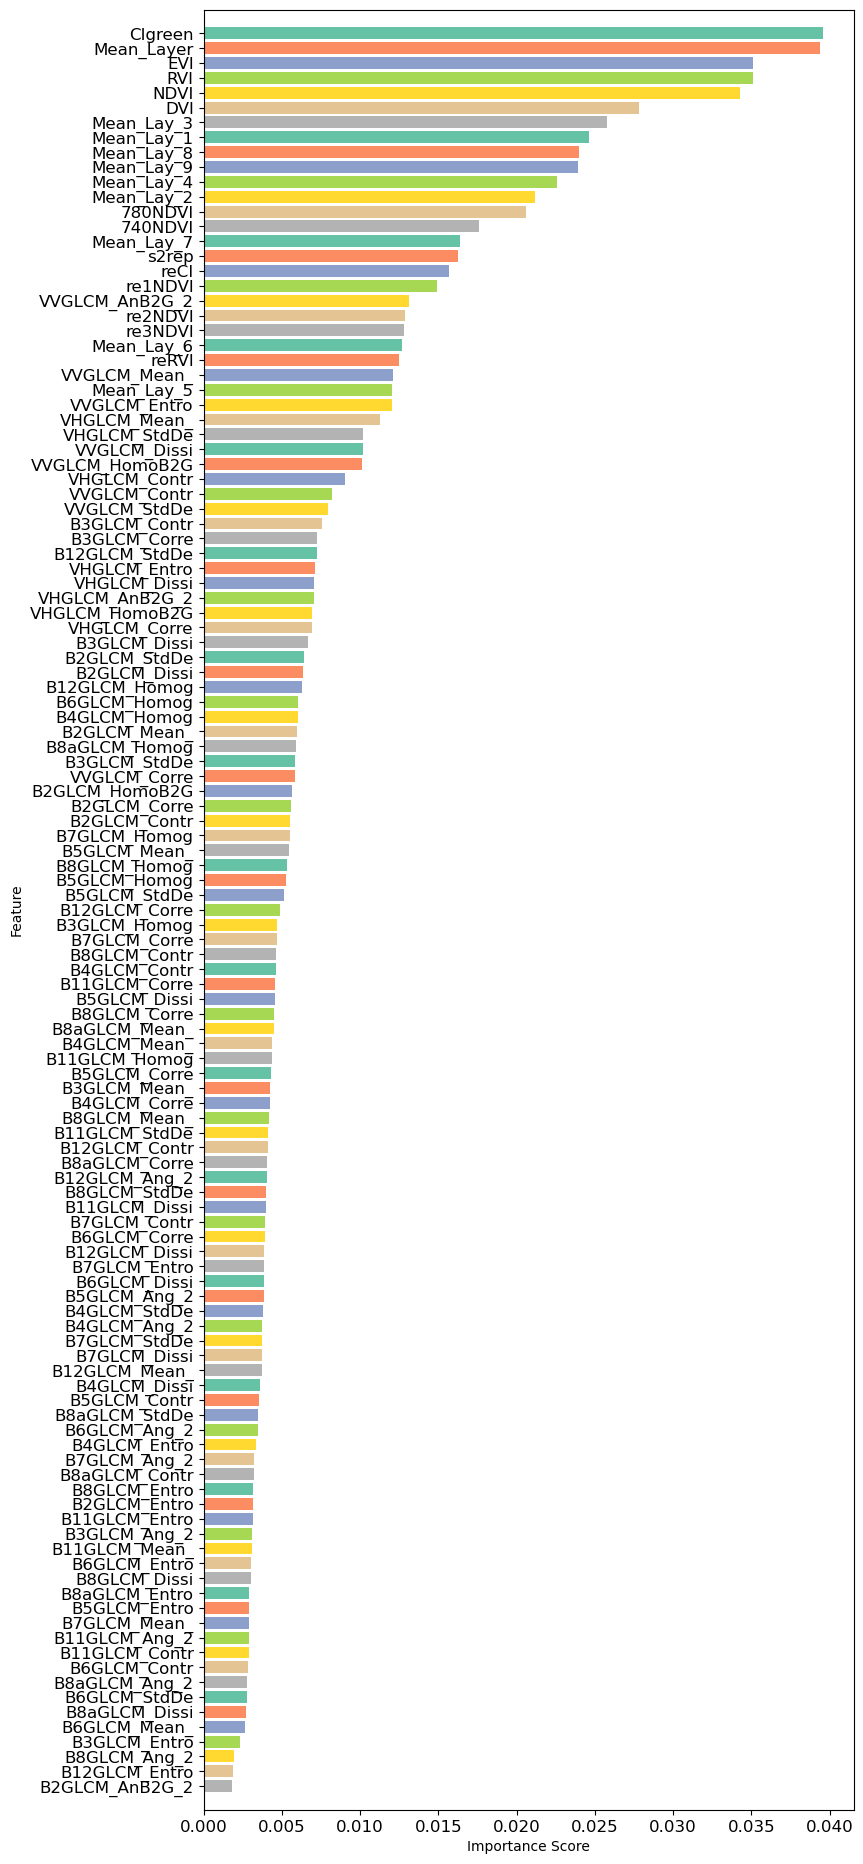

In [32]:
fig, ax = plt.subplots(figsize=(10, 20))
bar_colors = plt.cm.get_cmap('Set2', 7)
x_pos = np.arange(len(sorted_features))
ax.barh(x_pos, [x[1] for x in sorted_features], color=bar_colors(x_pos % 7))#,height=0.5
ax.set_yticks(x_pos)
ax.set_yticklabels([x[0] for x in sorted_features])
ax.invert_yaxis()
ax.set_xlabel('Importance Score',fontsize=10)
ax.set_ylabel('Feature',fontsize=10)
ax.tick_params(axis='both', labelsize=12)
ax.margins(x=0.05, y=0.01, tight=True)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.3, right=0.95, hspace=0.1)
plt.show()
fig.tight_layout()
fig.savefig('栾鑫告12_RF_importance.png', dpi=300, bbox_inches='tight')

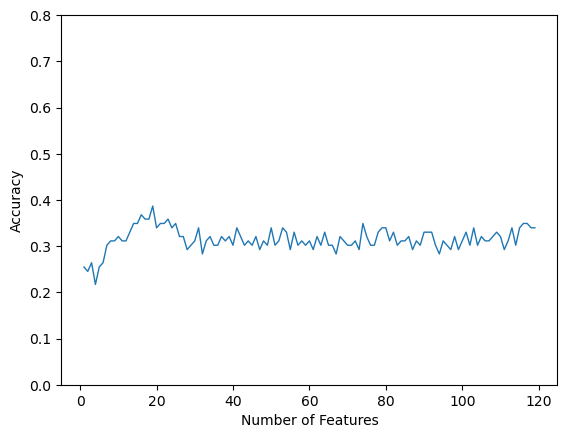

In [33]:
# 按照特征重要性排序逐步加入特征，并计算模型精度
features = list(data.drop('SZ', axis=1).columns)
accuracy_list = []
feature_num_list = []
for i in range(len(features)):
    # 只选择前i+1个特征
    selected_features = features[:i+1]
    # 选择特征列
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    # 拟合模型
    rf.fit(X_train_selected, y_train)
    # 在测试集上进行预测
    y_pred = rf.predict(X_test_selected)
    # 计算模型精度
    accuracy = sum(y_pred == y_test) / len(y_test)
    # 记录模型精度和特征数量
    accuracy_list.append(accuracy)
    feature_num_list.append(i+1)

# 绘制特征数量和模型精度之间的关系图
fig, ax = plt.subplots()
plt.plot(feature_num_list, accuracy_list, linestyle='-', linewidth=1)
plt.ylim(0, 0.8)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()
fig.tight_layout()
fig.savefig('栾鑫告12_importance.png', dpi=300, bbox_inches='tight')